<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#World-Millitary-expense-analysis---Animation" data-toc-modified-id="World-Millitary-expense-analysis---Animation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>World Millitary expense analysis - Animation</a></span><ul class="toc-item"><li><span><a href="#Country-wise-spendings" data-toc-modified-id="Country-wise-spendings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Country wise spendings</a></span><ul class="toc-item"><li><span><a href="#Average-spendings" data-toc-modified-id="Average-spendings-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Average spendings</a></span></li><li><span><a href="#Last-decade-spendings-trend" data-toc-modified-id="Last-decade-spendings-trend-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Last decade spendings trend</a></span></li><li><span><a href="#Animation---Millitary-expense-Top-20-countries-from-year-1960-2018" data-toc-modified-id="Animation---Millitary-expense-Top-20-countries-from-year-1960-2018-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Animation - Millitary expense Top 20 countries from year 1960-2018</a></span></li><li><span><a href="#Global-military-expenditures-by-country-for-2018,-in-US$-billions" data-toc-modified-id="Global-military-expenditures-by-country-for-2018,-in-US$-billions-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Global military expenditures by country for 2018, in US$ billions</a></span></li></ul></li><li><span><a href="#Geographically-spendings" data-toc-modified-id="Geographically-spendings-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Geographically spendings</a></span><ul class="toc-item"><li><span><a href="#World-map" data-toc-modified-id="World-map-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>World map</a></span></li></ul></li></ul></li></ul></div>

# World Millitary expense analysis - Animation

**Preamble**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
expense = pd.read_csv('../input/military-expenditure-of-countries-19602019/Military Expenditure.csv')
expense.head()

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,Angola,AGO,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,Albania,ALB,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,Andorra,AND,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Country wise spendings

There are total 4 categories. Get the count of each category records


In [3]:
expense.Type.value_counts()

Country                           202
Regions Clubbed Economically       33
Semi Autonomous Region             18
Regions Clubbed Geographically     11
Name: Type, dtype: int64

In [4]:
#Remove type other than Country
expense_country = expense[expense.Type == 'Country'].copy()
del expense_country['Code']
del expense_country['Type']
del expense_country['Indicator Name']

expense_country.set_index('Name', inplace=True)

#Convert spendings to billion
expense_country = expense_country.div(1000000000)

### Average spendings

In [5]:
expense_country['average expenditure'] = expense_country.mean(axis=1)

In [6]:
# Get top 10 countries with their average Military spendings
top10_average = expense_country.sort_values(by='average expenditure', ascending=False)[:10]

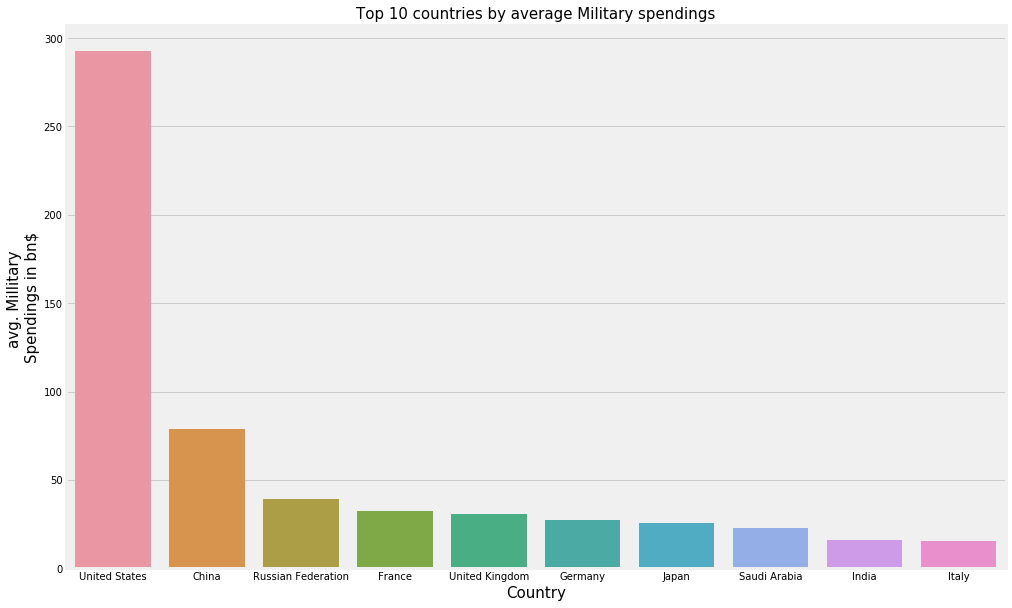

In [7]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(x=top10_average.index, y=top10_average['average expenditure'])
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel('avg. Millitary \nSpendings in bn$', fontsize=15)
ax.set_title('Top 10 countries by average Military spendings', fontsize=15);

### Last decade spendings trend



In [8]:
decade_spendings = top10_average[['2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018']]


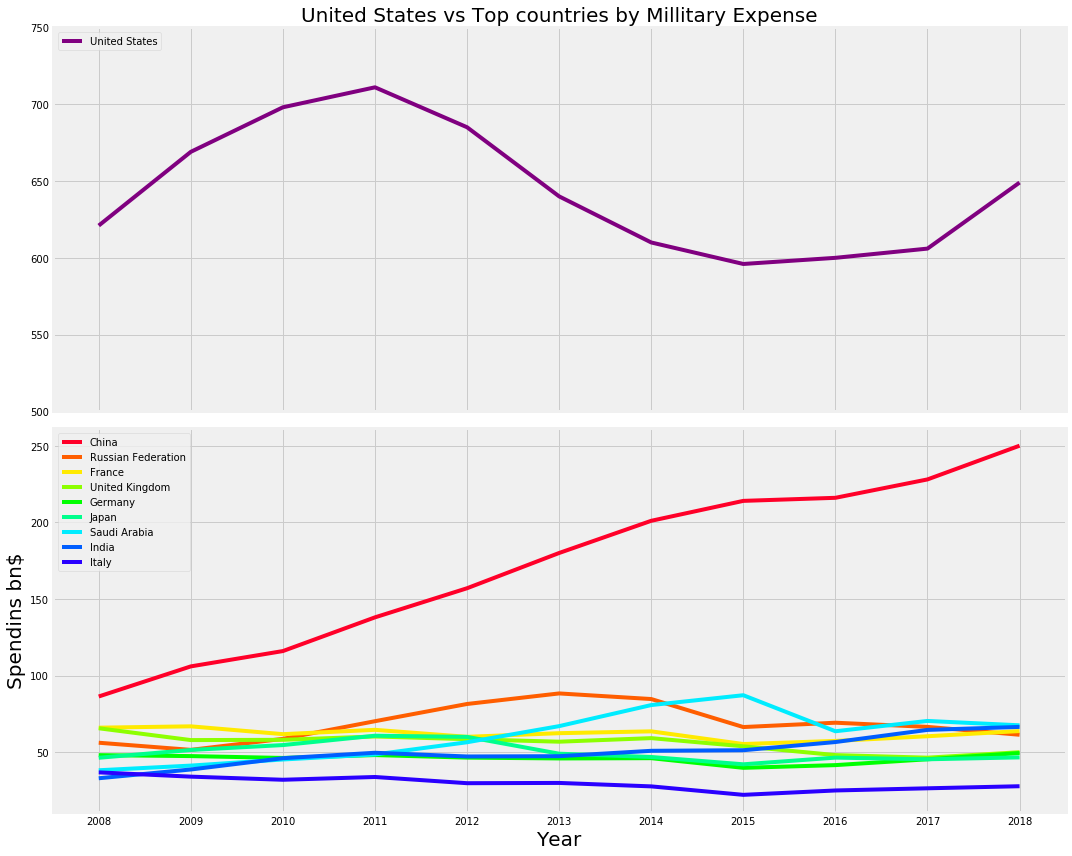

In [9]:
plt.figure(figsize=(15, 12))

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)


NUM_COLORS = 10
cm = plt.get_cmap('gist_rainbow')
ax2.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for index, row in decade_spendings.iterrows():
    if index == 'United States':
        ax1.plot(decade_spendings.columns, np.ravel(row), label=index, color='purple')
        continue
        
    ax2.plot(decade_spendings.columns, np.ravel(row), label=index)


ax1.legend(loc='upper left')
ax1.set_ylim(500, 750)
ax1.set_xticklabels([])
ax2.legend()
ax2.set_xlabel('Year', fontsize=20)
ax2.set_ylabel('Spendins bn$', fontsize=20);
ax1.set_title('United States vs Top countries by Millitary Expense', fontsize=20);
plt.tight_layout()

As per above graph United state's spendings was increasing till year 2011. After that there is decline in spending. 
China is consistently increasing Millitary spendings. Rest top 10 countries has small spikes in spendings. 

### Animation - Millitary expense Top 20 countries from year 1960-2018

In [10]:
expense_country_all = expense[expense.Type == 'Country'].copy()
del expense_country_all['Code']
del expense_country_all['Type']
del expense_country_all['Indicator Name']
expense_country_all.set_index('Name', inplace=True)
expense_country_all = expense_country_all.div(1000000000)

In [11]:
import matplotlib.animation as animation
from IPython.display import HTML
from IPython.display import Image

def run(i):
    #print(i)
    s = expense_country_all.iloc[:, i].sort_values(ascending=False)[:20]
    plt.clf()
    #plt.barh(s.index, s)
    plt.xlim(0, s[0]+50)
    ax = sns.barplot(s, s.index, palette=sns.color_palette("husl", n_colors=20))
    plt.title('Millitary expense Top 20 countries from year 1960-2018\nYear-{}'.format(s.name))
    plt.xlabel('Millitary expense in US$ billions', fontsize=12)
    plt.ylabel('')
    for p in ax.patches:
        text = format(p.get_width(), '.2f')
        ax.annotate(text, (p.get_width()+.3, 
                    p.get_y()+ p.get_height()/2), va = 'center', )
    plt.gcf().subplots_adjust(left=0.15)
    #plt.tight_layout()
    

frames = len(expense_country_all.columns)
    
fig = plt.figure(figsize=(15, 12)) 

anim = animation.FuncAnimation(fig, run, blit=False, interval=500, repeat=False, frames=frames)
anim.save('top20.gif')    
plt.close(anim._fig)
#display(Image(url='filename.gif'))

In [12]:
display(Image(url='top20.gif'))

###  Global military expenditures by country for 2018, in US$ billions

In [13]:
countries = expense_country['2018'].sort_values(ascending=False)[:10]
rest_world = expense_country['2018'].sort_values(ascending=False)[11:].sum()
countries = countries.append(pd.Series(rest_world, index=['Rest world']))

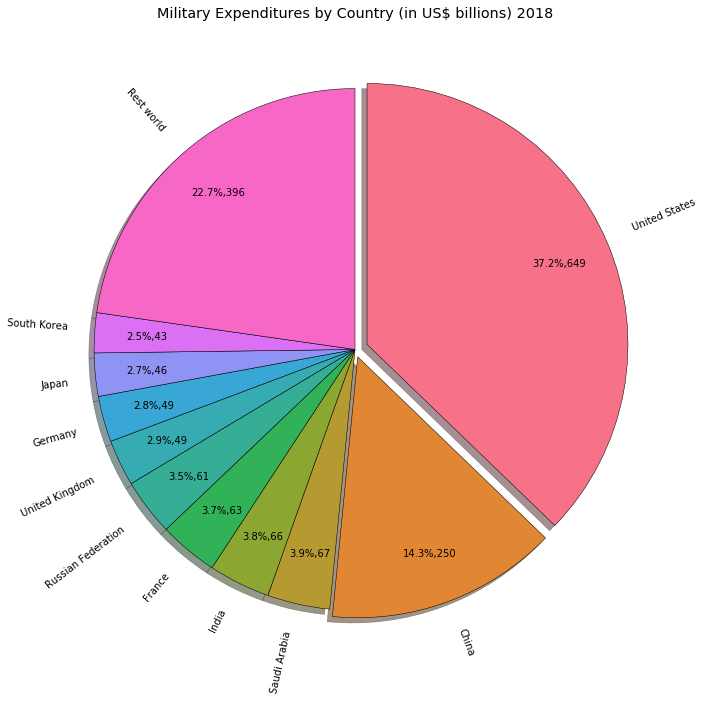

In [14]:
plt.figure(figsize=(12, 12))
plt.title('Military Expenditures by Country (in US$ billions) 2018')
#colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99']
sns.color_palette("hls", 11)
explode=[.0]*11
explode[0] = .05
explode[1] = .03

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%,{:d}".format(pct, absolute)

plt.pie(countries, labels=countries.index, autopct=lambda pct: func(pct, countries),
        shadow=True, startangle=90, counterclock=False, explode=explode,
        rotatelabels=True, pctdistance=.8, wedgeprops = {'edgecolor': 'black'}, colors=sns.color_palette("husl", 11) );

United states and china alone has more than 50% share of millitary spendings than rest world.

## Geographically spendings

In [15]:
expense_geographically = expense[expense.Type == 'Regions Clubbed Geographically'].copy()
del expense_geographically['Code']
del expense_geographically['Type']
del expense_geographically['Indicator Name']
#del expense_geographically[['Name' == 'World']]
expense_geographically.set_index('Name', inplace=True)
expense_geographically = expense_geographically.div(1000000000)

In [16]:
expense_geographically = expense_geographically.drop('World')

In [17]:
def run(i):
    #print(i)
    s = expense_geographically.iloc[:, i].sort_values(ascending=False)
    plt.clf()
    #plt.barh(s.index, s)
    plt.xlim(0, s[0]+50)
    ax = sns.barplot(s, s.index, palette=sns.color_palette("husl", n_colors=20))
    plt.title('Millitary expense regions from year 1960-2018\nYear-{}'.format(s.name))
    plt.xlabel('Millitary expense in Bn$', fontsize=12)
    plt.ylabel('')
    for p in ax.patches:
        text = format(p.get_width(), '.2f')
        ax.annotate(text, (p.get_width()+.3, 
                    p.get_y()+ p.get_height()/2), va = 'center', )
    #plt.tight_layout()
    plt.gcf().subplots_adjust(left=0.30)

frames = len(expense_geographically.columns)
    
fig = plt.figure(figsize=(15, 8)) 

anim = animation.FuncAnimation(fig, run, blit=False, interval=500, repeat=False, frames=frames)
anim.save('top20r.gif')    
plt.close(anim._fig)


In [18]:
display(Image(url='top20r.gif'))

### World map

In [19]:
# convert millitary spendings in 4 parts
expense_country_all = expense[expense.Type == 'Country'].copy()

del expense_country_all['Type']
del expense_country_all['Indicator Name']
expense_country_all.set_index('Code', inplace=True)
data_2018 = expense_country_all['2018'].div(1000000000)

In [20]:
import cartopy.io.shapereader as shpreader
shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

/opt/conda/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


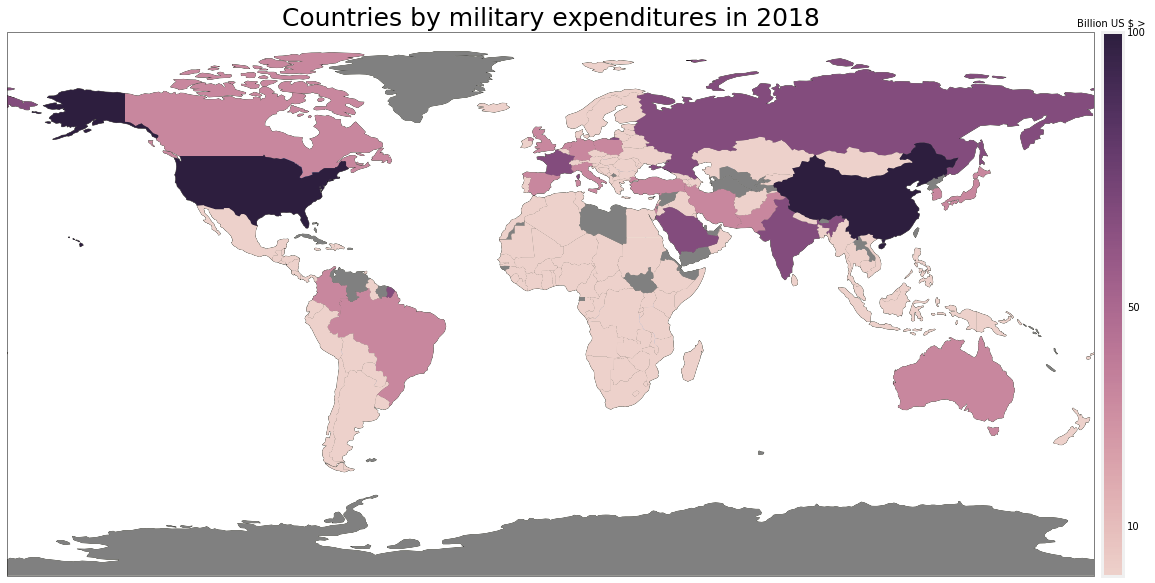

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
from shapely.geometry.polygon import Polygon


import sys

import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree())
#ax = plt.axes(projection=ccrs.Robinson())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
ax.add_feature(cartopy.feature.RIVERS)

reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:    
    # default grey color
    try:
        color = (.5,.5,.5)
        colors = sns.cubehelix_palette(4)        
        if country.attributes['ADM0_A3'] in data_2018:
            #print(country.attributes['ADM0_A3'])    
            exp = data_2018[country.attributes['ADM0_A3']]
            #print(exp)
            
            if np.isnan(exp):
                color = (.5,.5,.5)
            elif exp >= 100:
                color = tuple(colors[3])
            elif exp >= 50 and exp < 100:
                color = tuple(colors[2])
            elif exp >= 10 and exp < 50:
                color = tuple(colors[1])
            elif exp < 10:
                color = tuple(colors[0])
        #else :
            #print(country.attributes['NAME_EN'])
        
        if isinstance(country.geometry, Polygon):
            #ax.add_geometries(MultiPolygon(polygons=[testobj]), ccrs.PlateCarree(), 
            #             facecolor=color, label=country.attributes['ADM0_A3'])
            ax.add_feature(ShapelyFeature([country.geometry], ccrs.PlateCarree()), facecolor=color)
            #print(country.attributes['NAME_EN'])
        else:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), 
                          facecolor=color, label=country.attributes['ADM0_A3'])
    except:
        #e = sys.exc_info()[0]
        exctype, value = sys.exc_info()[:2]
        print('Error', country.attributes['NAME_EN'], exctype, value )
        break
    

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="2%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax_cb)

norm = mpl.colors.Normalize(vmin=1,vmax=100)
sm = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(4, as_cmap=True), norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.array([10,50,100]), fraction=0.046, pad=0.04, cax=ax_cb)

ax.set_title('Countries by military expenditures in 2018', fontsize=25)
ax_cb.set_title('Billion US $ > ', fontsize=10)

plt.show()